In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:
file = open("2024-06-30 15-14-48.csv")

In [110]:
file = open("2024-06-30 15-14-48.csv")
header = file.readline()
wheel = []
vel = []
time = []
last_time = 0
min_w = 1000
max_w = 0
for line in file:
    val = line.split(";")
    PID = val[1]
    if(PID.find("wheel speed") != -1):
        if(PID.find("Front left") != -1):
            min_w = float(val[2].replace("\"", ""))
            max_w = float(val[2].replace("\"", ""))
            last_time = float(val[0].replace("\"", "")) - 60659.172324
        elif(float(val[2].replace("\"", "")) < min_w and 
             (float(val[0].replace("\"", "")) - 60659.172324) == last_time):
            min_w = float(val[2].replace("\"", ""))
        if(PID.find("Rear right") != -1):
            vel.append((max_w-min_w)*3.6)
            time.append(float(val[0].replace("\"", "")) - 60659.172324)
            wheel.append("deltha")
    elif(PID.find("Velocidade (GPS)") != -1):        
        #print(float(val[0].replace("\"", "")))
        #print(val[0])
        #print(last_time)
        ts = float(val[0].replace("\"", ""))
        if(last_time != 0 and ((ts - 60659.172324) > (last_time - 60)) 
           and ((ts - 60659.172324) < (last_time + 60)) and (float(val[2].replace("\"", ""))) > 60):
            #print("car")
            vel.append(float(val[2].replace("\"", "")))
            wheel.append("car")
            time.append(ts - 60659.172324)
file.close()

In [111]:
df_car = pd.DataFrame(list(zip(wheel, time, vel)), columns =['wheel', 'timestamp', 'velocity'])

In [100]:
df_car[0:2000]

,wheel,timestamp,velocity
0,deltha,0.000,0.449280
1,deltha,1.079,0.224640
2,car,1.364,100.763999
3,car,1.365,100.763999
4,car,1.366,100.763999
...,...,...,...
1995,deltha,621.848,0.168480
1996,deltha,622.517,0.393120
1997,deltha,623.244,0.280800
1998,deltha,623.922,0.224640


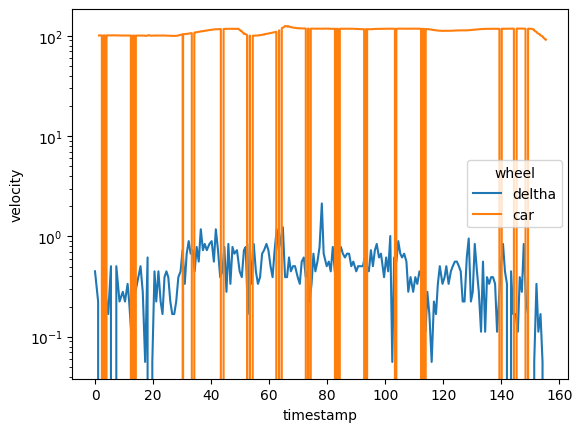

In [105]:
sns.lineplot(
    data=df_car[0:1000], x="timestamp", y="velocity", hue="wheel"
)
#plt.yscale('log')
sns.lineplot(data=df_car[0:1000].loc[df_car["wheel"] == "car"], x="timestamp", y="velocity", color="b")
ax2 = plt.twinx()
sns.lineplot(data=df_car[0:1000].loc[df_car["wheel"] == "deltha"], x="timestamp", y="velocity", color="o", ax=ax2)

<Axes: xlabel='timestamp', ylabel='velocity'>

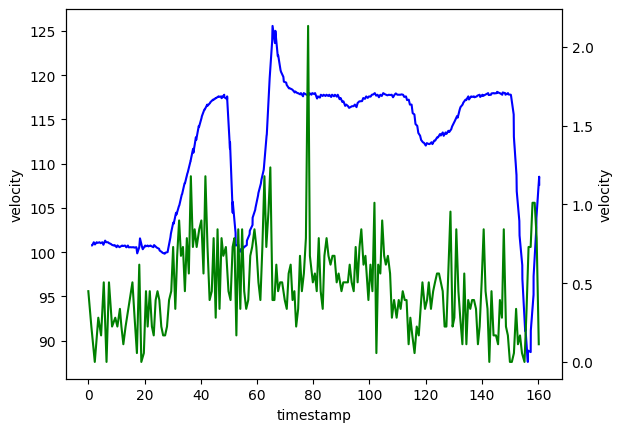

In [120]:
sns.lineplot(data=df_car[0:1000].loc[df_car["wheel"] == "car"], x="timestamp", y="velocity", color="b")
ax2 = plt.twinx()
sns.lineplot(data=df_car[0:1000].loc[df_car["wheel"] == "deltha"], x="timestamp", y="velocity", color="g", ax=ax2)
#plt.savefig("car.png", bbox_inches='tight')